In [152]:
import pandas as pd
import pandas as pd

# Assuming you already have your DataFrame loaded as 'df'
passport_data.info()  # To display basic structure and column information
print("\nSummary Statistics:")
print(passport_data.describe())  # To display summary statistics for numeric columns

# Checking for missing values explicitly
print("\nMissing Values:")
print(passport_data.isnull().sum())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Columns: 200 entries, Passport to Afghanistan
dtypes: int64(1), object(199)
memory usage: 311.1+ KB

Summary Statistics:
       Micronesia
count  199.000000
mean    42.507538
std     38.874944
min     -1.000000
25%     30.000000
50%     30.000000
75%     30.000000
max    360.000000

Missing Values:
Passport       0
Albania        0
Algeria        0
Andorra        0
Angola         0
              ..
Vietnam        0
Yemen          0
Zambia         0
Zimbabwe       0
Afghanistan    0
Length: 200, dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Columns: 200 entries, Passport to Afghanistan
dtypes: int64(1), object(199)
memory usage: 311.1+ KB


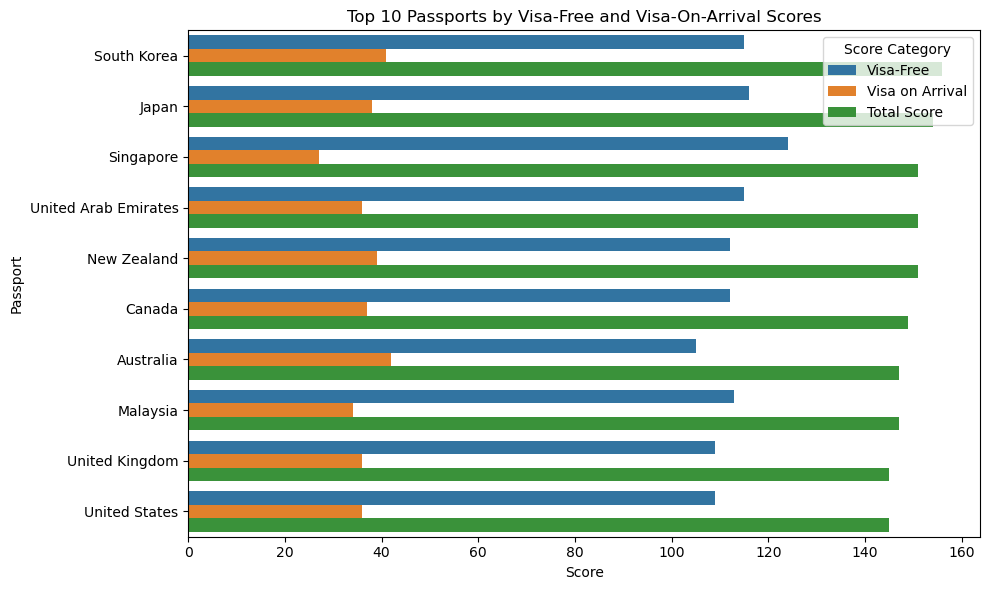

In [128]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the uploaded file to inspect its content
file_path = 'passport-index-matrix.csv'
passport_data = pd.read_csv(file_path)

# Display the first few rows of the data and general information
passport_data.head(), passport_data.info()
# Define valid categories for Passport Index
visa_free_categories = ["visa-free"] + [str(i) for i in range(7, 361)]  # Includes durations 7–360
visa_on_arrival_categories = ["visa on arrival"]

# Calculate scores based on the updated Passport Index methodology (only Visa-Free and Visa-On-Arrival)
def calculate_scores(row):
    # For visa-free, check if there is any number (greater than 0 or visa-free keyword)
    visa_free_score = sum(1 for val in row if str(val).strip() in visa_free_categories and val != "-1")
    visa_on_arrival_score = sum(1 for val in row if str(val).strip() in visa_on_arrival_categories)
    return visa_free_score, visa_on_arrival_score

# Apply scoring logic
scores = passport_data.iloc[:, 1:].apply(calculate_scores, axis=1)
passport_data['Visa-Free'] = [score[0] for score in scores]
passport_data['Visa on Arrival'] = [score[1] for score in scores]

# Calculate total score (visa-free + visa-on-arrival)
passport_data['Total Score'] = passport_data['Visa-Free'] + passport_data['Visa on Arrival']

# Create rankings based on total score (ascending=False gives highest rank first)
passport_data['Rank'] = passport_data['Total Score'].rank(ascending=False, method='min')

# Display top 10 passports based on total score
top_passports = passport_data[['Rank', 'Passport', 'Visa-Free', 'Visa on Arrival', 'Total Score']].sort_values(by='Rank').head(10)

# Plotting
plt.figure(figsize=(10, 6))

# Plot bar chart for Visa-Free, Visa on Arrival, and Total Score
top_passports_melted = top_passports.melt(id_vars=["Rank", "Passport"], value_vars=["Visa-Free", "Visa on Arrival", "Total Score"], 
                                          var_name="Category", value_name="Score")

sns.barplot(data=top_passports_melted, x="Score", y="Passport", hue="Category", dodge=True)

# Customize plot
plt.title('Top 10 Passports by Visa-Free and Visa-On-Arrival Scores')
plt.xlabel('Score')
plt.ylabel('Passport')
plt.legend(title="Score Category")
plt.tight_layout()

# Show the plot
plt.show()





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Columns: 200 entries, Passport to Afghanistan
dtypes: int64(1), object(199)
memory usage: 311.1+ KB


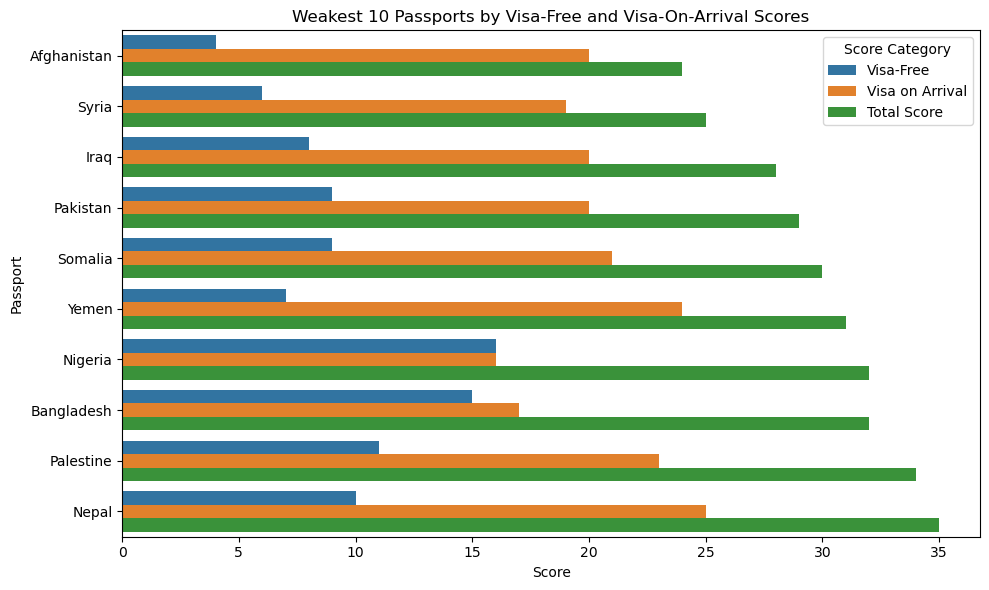

,Rank,Passport,Visa-Free,Visa on Arrival,Total Score
0,1.0,Afghanistan,4,20,24
172,2.0,Syria,6,19,25
80,3.0,Iraq,8,20,28
133,4.0,Pakistan,9,20,29
161,5.0,Somalia,9,21,30
196,6.0,Yemen,7,24,31
128,7.0,Nigeria,16,16,32
13,7.0,Bangladesh,15,17,32
135,9.0,Palestine,11,23,34
123,10.0,Nepal,10,25,35


In [126]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the uploaded file to inspect its content
file_path = 'passport-index-matrix.csv'
passport_data = pd.read_csv(file_path)

# Display the first few rows of the data and general information
passport_data.head(), passport_data.info()
# Define valid categories for Passport Index
visa_free_categories = ["visa-free"] + [str(i) for i in range(7, 361)]  # Includes durations 7–360
visa_on_arrival_categories = ["visa on arrival"]

# Calculate scores based on the updated Passport Index methodology (only Visa-Free and Visa-On-Arrival)
def calculate_scores(row):
    # For visa-free, check if there is any number (greater than 0 or visa-free keyword)
    visa_free_score = sum(1 for val in row if str(val).strip() in visa_free_categories and val != "-1")
    visa_on_arrival_score = sum(1 for val in row if str(val).strip() in visa_on_arrival_categories)
    return visa_free_score, visa_on_arrival_score

# Apply scoring logic
scores = passport_data.iloc[:, 1:].apply(calculate_scores, axis=1)
passport_data['Visa-Free'] = [score[0] for score in scores]
passport_data['Visa on Arrival'] = [score[1] for score in scores]

# Calculate total score (visa-free + visa-on-arrival)
passport_data['Total Score'] = passport_data['Visa-Free'] + passport_data['Visa on Arrival']

# Create rankings based on total score (ascending=False gives highest rank first)
passport_data['Rank'] = passport_data['Total Score'].rank(ascending=True, method='min')  # Ascending to get lowest rank first

# Display bottom 10 weakest passports based on total score
weakest_passports = passport_data[['Rank', 'Passport', 'Visa-Free', 'Visa on Arrival', 'Total Score']].sort_values(by='Rank').head(10)

# Plotting
plt.figure(figsize=(10, 6))

# Plot bar chart for Visa-Free, Visa on Arrival, and Total Score for weakest passports
weakest_passports_melted = weakest_passports.melt(id_vars=["Rank", "Passport"], value_vars=["Visa-Free", "Visa on Arrival", "Total Score"], 
                                                  var_name="Category", value_name="Score")

sns.barplot(data=weakest_passports_melted, x="Score", y="Passport", hue="Category", dodge=True)

# Customize plot
plt.title('Weakest 10 Passports by Visa-Free and Visa-On-Arrival Scores')
plt.xlabel('Score')
plt.ylabel('Passport')
plt.legend(title="Score Category")
plt.tight_layout()

# Show the plot
plt.show()
weakest_passports[['Rank', 'Passport', 'Visa-Free', 'Visa on Arrival', 'Total Score']]

Index(['#', 'Country', 'GDP (PPP) \n per capita \n (2022)',
       'GDP (nominal)\n per capita\n (2022)',
       'vs. World PPP \n GDP per capita\n ($20,645)'],
      dtype='object')


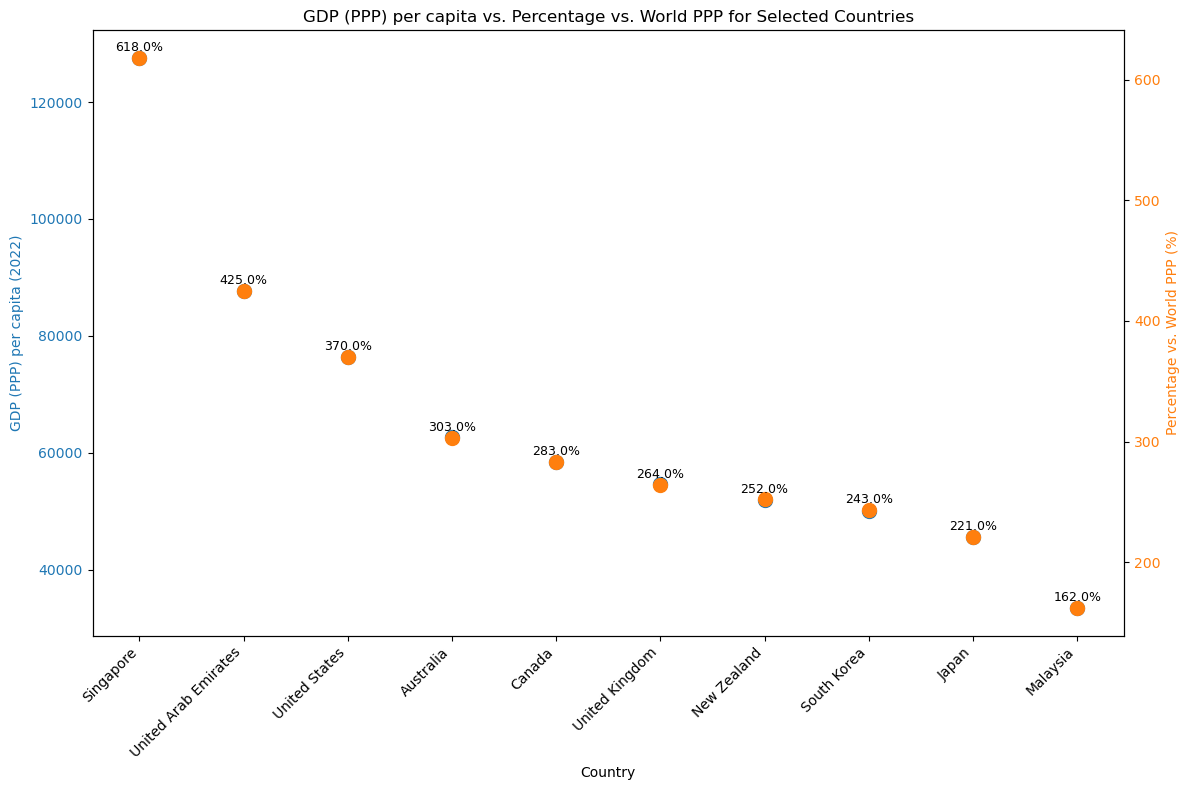

In [102]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'gdpworld.csv'
data = pd.read_csv(file_path, encoding='ISO-8859-1')

# Confirm column names
print(data.columns)

# List of countries to analyze
countries = [
    "South Korea", "Japan", "Singapore", "United Arab Emirates", 
    "New Zealand", "Canada", "Malaysia", "Australia", 
    "United Kingdom", "United States"
]

# Filter data for the countries of interest
filtered_data = data[data['Country'].isin(countries)].copy()

# Clean and extract relevant columns
filtered_data['GDP (PPP) per capita (2022)'] = (
    filtered_data['GDP (PPP) \n per capita \n (2022)']
    .str.replace(r'[^\d.]', '', regex=True)  # Remove non-numeric characters
    .astype(float)
)

filtered_data['Percentage vs World PPP'] = (
    filtered_data['vs. World PPP \n GDP per capita\n ($20,645)']
    .str.replace(r'%', '', regex=True)  # Remove percentage sign
    .astype(float)
)

# Sort data for better visualization
filtered_data = filtered_data.sort_values(by='GDP (PPP) per capita (2022)', ascending=False)

import matplotlib.pyplot as plt

# Create a plot with dual axes
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot GDP per capita (dots) on the primary y-axis
ax1.set_xlabel("Country")
ax1.set_ylabel("GDP (PPP) per capita (2022)", color='tab:blue')
scatter1 = ax1.scatter(
    range(len(filtered_data['Country'])), 
    filtered_data['GDP (PPP) per capita (2022)'],
    color='tab:blue',
    s=100,  # Set size of dots
    label="GDP per capita"
)

ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.set_xticks(range(len(filtered_data['Country'])))
ax1.set_xticklabels(filtered_data['Country'], rotation=45, ha='right')

# Create a second y-axis for the percentages as dots
ax2 = ax1.twinx()
ax2.set_ylabel("Percentage vs. World PPP (%)", color='tab:orange')
scatter2 = ax2.scatter(
    range(len(filtered_data['Country'])), 
    filtered_data['Percentage vs World PPP'],
    color='tab:orange',
    s=100,  # Set size of dots
    label="Percentage"
)

ax2.tick_params(axis='y', labelcolor='tab:orange')

# Annotate the dots with their exact percentage values
for i, percentage in enumerate(filtered_data['Percentage vs World PPP']):
    ax2.annotate(f"{percentage}%", 
                 (i, percentage), 
                 textcoords="offset points",
                 xytext=(0, 5), 
                 ha='center', 
                 fontsize=9)

# Add title and layout adjustments
plt.title("GDP (PPP) per capita vs. Percentage vs. World PPP for Selected Countries")
fig.tight_layout()

# Show plot
plt.show()


Index(['#', 'Country', 'GDP (PPP) \n per capita \n (2022)',
       'GDP (nominal)\n per capita\n (2022)',
       'vs. World PPP \n GDP per capita\n ($20,645)'],
      dtype='object')


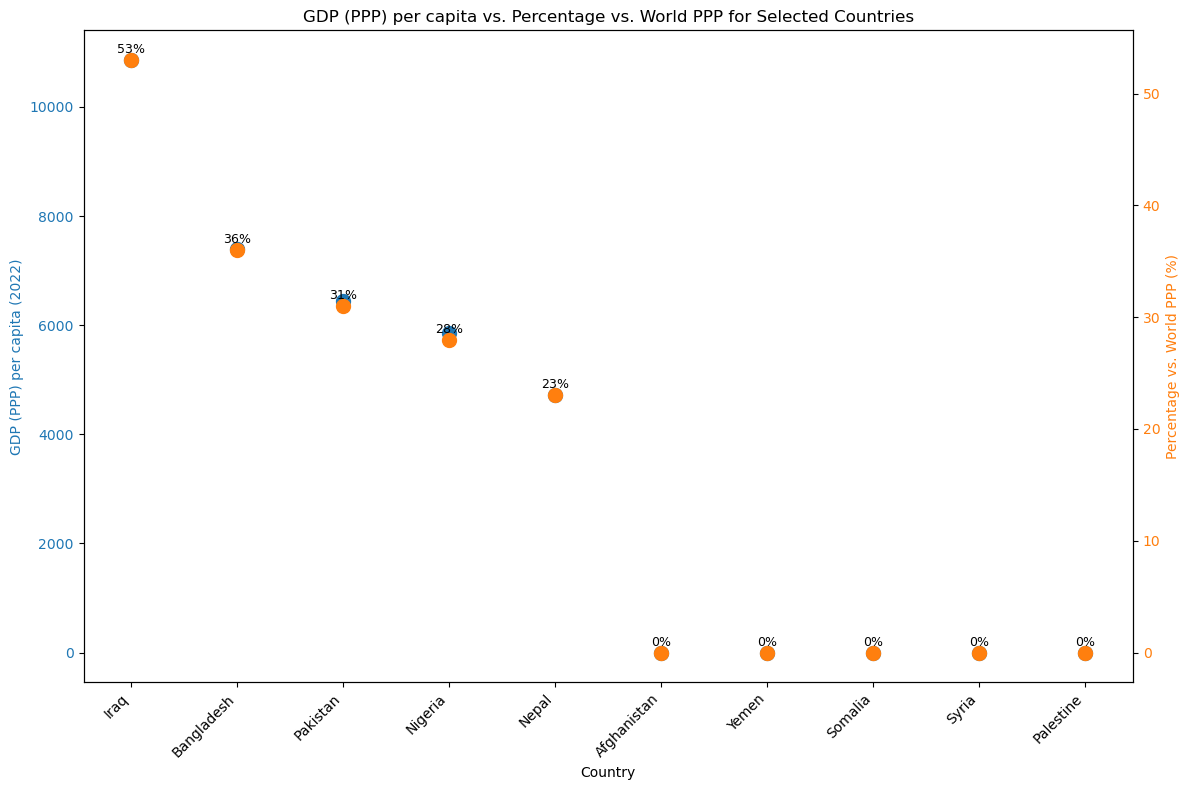

In [130]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'gdpworld.csv'
data = pd.read_csv(file_path, encoding='ISO-8859-1')

# Confirm column names
print(data.columns)

# List of countries to analyze
countries = [
    "Afghanistan", "Syria", "Iraq", "Pakistan", "Yemen", "Nigeria",
    "Bangladesh", "Nepal"
]

# Filter data for the countries of interest
filtered_data = data[data['Country'].isin(countries)].copy()

# Clean and extract relevant columns
filtered_data['GDP (PPP) per capita (2022)'] = pd.to_numeric(
    filtered_data['GDP (PPP) \n per capita \n (2022)'].str.replace(r'[^\d.]', '', regex=True),
    errors='coerce'
)

filtered_data['Percentage vs World PPP'] = pd.to_numeric(
    filtered_data['vs. World PPP \n GDP per capita\n ($20,645)'].str.replace(r'%', '', regex=True),
    errors='coerce'
)

# Replace NaN with 0
filtered_data['GDP (PPP) per capita (2022)'] = filtered_data['GDP (PPP) per capita (2022)'].fillna(0)
filtered_data['Percentage vs World PPP'] = filtered_data['Percentage vs World PPP'].fillna(0)

# Manually add Somalia, Syria, and Palestine with 0 values
manual_entries = pd.DataFrame({
    'Country': ['Somalia', 'Syria', 'Palestine'],
    'GDP (PPP) per capita (2022)': [0, 0, 0],
    'Percentage vs World PPP': [0, 0, 0]
})

# Combine the actual data with the manually added entries
combined_data = pd.concat([filtered_data, manual_entries], ignore_index=True)

# Sort data for better visualization
combined_data = combined_data.sort_values(by='GDP (PPP) per capita (2022)', ascending=False)

# Create a plot with dual axes
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot GDP per capita (dots) on the primary y-axis
ax1.set_xlabel("Country")
ax1.set_ylabel("GDP (PPP) per capita (2022)", color='tab:blue')
scatter1 = ax1.scatter(
    range(len(combined_data['Country'])), 
    combined_data['GDP (PPP) per capita (2022)'],
    color='tab:blue',
    s=100,  # Set size of dots
    label="GDP per capita"
)

ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.set_xticks(range(len(combined_data['Country'])))
ax1.set_xticklabels(combined_data['Country'], rotation=45, ha='right')

# Create a second y-axis for the percentages as dots
ax2 = ax1.twinx()
ax2.set_ylabel("Percentage vs. World PPP (%)", color='tab:orange')
scatter2 = ax2.scatter(
    range(len(combined_data['Country'])), 
    combined_data['Percentage vs World PPP'],
    color='tab:orange',
    s=100,  # Set size of dots
    label="Percentage"
)

ax2.tick_params(axis='y', labelcolor='tab:orange')

# Annotate the dots with their exact percentage values
for i, percentage in enumerate(combined_data['Percentage vs World PPP']):
    ax2.annotate(f"{percentage:.0f}%", 
                 (i, percentage), 
                 textcoords="offset points",
                 xytext=(0, 5), 
                 ha='center', 
                 fontsize=9)

# Add title and layout adjustments
plt.title("GDP (PPP) per capita vs. Percentage vs. World PPP for Selected Countries")
fig.tight_layout()

# Show plot
plt.show()


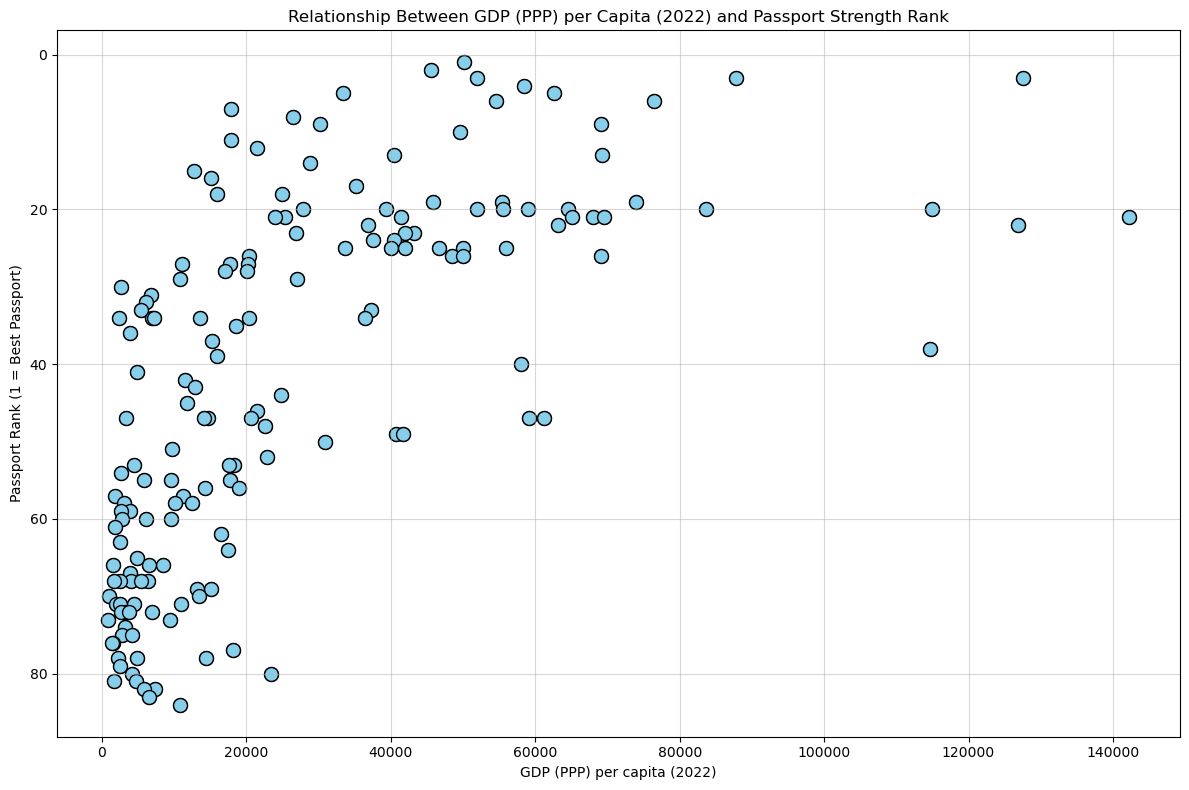

In [146]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load passport data and GDP data
passport_file_path = 'passport-index-matrix.csv'
gdp_file_path = 'gdpworld.csv'

passport_data = pd.read_csv(passport_file_path)
gdp_data = pd.read_csv(gdp_file_path, encoding='ISO-8859-1')

# Prepare passport data
visa_free_categories = ["visa-free"] + [str(i) for i in range(7, 361)]
visa_on_arrival_categories = ["visa on arrival"]

def calculate_scores(row):
    visa_free_score = sum(1 for val in row if str(val).strip() in visa_free_categories and val != "-1")
    visa_on_arrival_score = sum(1 for val in row if str(val).strip() in visa_on_arrival_categories)
    return visa_free_score, visa_on_arrival_score

scores = passport_data.iloc[:, 1:].apply(calculate_scores, axis=1)
passport_data['Visa-Free'] = [score[0] for score in scores]
passport_data['Visa on Arrival'] = [score[1] for score in scores]
passport_data['Total Score'] = passport_data['Visa-Free'] + passport_data['Visa on Arrival']
passport_data = passport_data[['Passport', 'Total Score']]  # Keep only relevant columns

# Prepare GDP data
# Use regex to clean non-numeric values robustly
gdp_data['GDP (PPP) per capita (2022)'] = (
    gdp_data['GDP (PPP) \n per capita \n (2022)']
    .str.replace(r'[^\d.]', '', regex=True)  # Remove any non-numeric characters except for digits or the decimal point
)

# Replace empty strings with NaN
gdp_data['GDP (PPP) per capita (2022)'] = gdp_data['GDP (PPP) per capita (2022)'].replace('', np.nan)

# Convert the GDP data to float safely
gdp_data['GDP (PPP) per capita (2022)'] = pd.to_numeric(gdp_data['GDP (PPP) per capita (2022)'], errors='coerce')

# Drop rows with NaN GDP values to ensure only valid GDP entries are included
gdp_data = gdp_data.dropna(subset=['GDP (PPP) per capita (2022)'])

# Merge the two datasets using the country name as the key
merged_data = pd.merge(
    passport_data.rename(columns={'Passport': 'Country'}), 
    gdp_data[['Country', 'GDP (PPP) per capita (2022)']], 
    on='Country', 
    how='inner'
)

# Calculate ranks based on Total Score
merged_data['Rank'] = merged_data['Total Score'].rank(method="dense", ascending=False)

# Sort data by rank for visualization purposes
merged_data = merged_data.sort_values(by='Rank')

# Scatter plot with GDP vs Rank
plt.figure(figsize=(12, 8))
plt.scatter(
    merged_data['GDP (PPP) per capita (2022)'], 
    merged_data['Rank'], 
    color='skyblue', 
    edgecolor='black', 
    s=100
)

# Ensure no lines or unwanted dash effects are introduced
plt.scatter(
    merged_data['GDP (PPP) per capita (2022)'], 
    merged_data['Rank'], 
    color='skyblue',
    edgecolor='black',
    s=100
)

# Customize the plot without annotations or lines
plt.title('Relationship Between GDP (PPP) per Capita (2022) and Passport Strength Rank')
plt.xlabel('GDP (PPP) per capita (2022)')
plt.ylabel('Passport Rank (1 = Best Passport)')
plt.gca().invert_yaxis()  # To show rank 1 at the top
plt.grid(alpha=0.5)
plt.tight_layout()

# Show the plot
plt.show()
